In [40]:
import numpy as np
from scipy.stats import poisson
from scipy.stats import uniform
import scipy.stats as sc
import matplotlib.pyplot as plt

# Structure Factor calculation

Structure factor is a Fourier quantity that quantifies the extend of periodic nature a certain distribution holds. \
structure factors S is given as a function of the wave vector for N particle system is: $$S(\mathbf{q}) = \frac{1}{N}\left|\sum_{j = 1}^{N} e^{-\mathrm{i}\mathbf{q.r_j}}\right|^2$$

In [41]:
def structure_factor(x,y,kx,ky):
    
    no_particle = len(x)*len(y)
    
    Kx, Ky,x_pos = np.meshgrid(kx,ky,x)
    Kx, Ky,y_pos = np.meshgrid(kx,ky,y)

    Argument = Kx*x_pos + Ky*y_pos

    cosQ = np.sum(np.cos(Argument), axis = 2)
    sinQ = np.sum(np.sin(Argument), axis = 2)

    S = (cosQ**2 + sinQ**2)/no_particle
   
    return S

# Square Lattice

Is a 2D lattice with translational symmetry along both axes. The period denoted by $a$ (in microns) determines the distance between the particles

In [43]:
# all units are in microns 

LengthSimDomain = 10

periodicity = 1

x = np.arange(start = -LengthSimDomain/2, stop =LengthSimDomain/2 + periodicity, step = periodicity, )

X,Y = np.meshgrid(x, x)

kx = np.linspace(-2*np.pi/periodicity,2*np.pi/periodicity,num=500) #np.linspace(-2*np.pi/max(x),2*np.pi/max(x),num = len(x), endpoint=True)
ky = np.linspace(-2*np.pi/periodicity,2*np.pi/periodicity,num=500) #np.linspace(-2*np.pi/max(y),2*np.pi/max(y),num = len(x), endpoint=True)

S_test = structure_factor(X,Y,kx,ky)

Plot

Text(0, 0.5, '$k_y$')

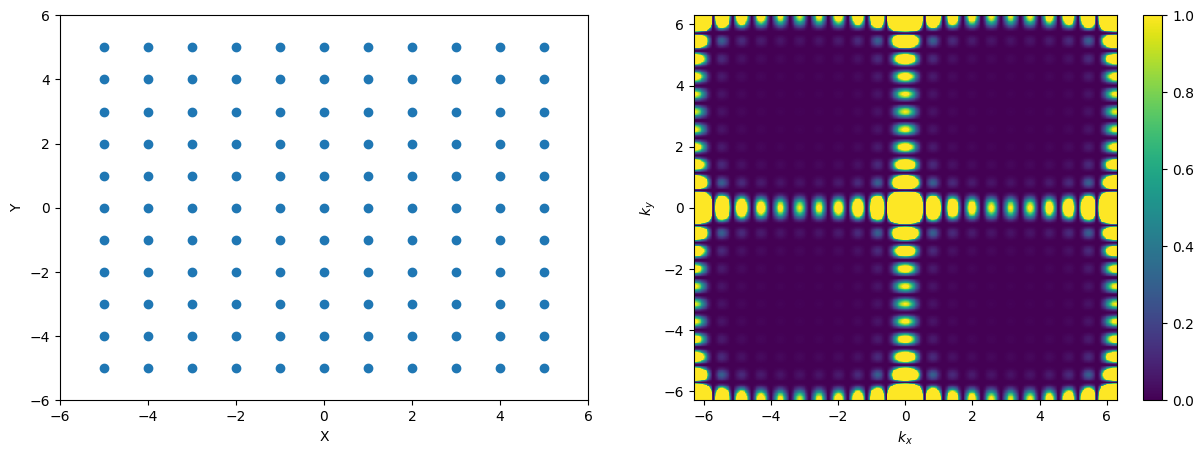

In [50]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(X,Y)
plt.xlim([-LengthSimDomain/2 - 1,LengthSimDomain/2+ 1])
plt.ylim([-LengthSimDomain/2 - 1,LengthSimDomain/2+ 1])
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(1,2,2)
plt.pcolormesh(kx,ky,S_test, cmap = 'viridis', vmin=0, vmax=1) 
plt.colorbar(location="right")
plt.xlabel("$k_x$")
plt.ylabel("$k_y$")


# Triangular/Hexagonal lattice



In [53]:
# all units are in microns 

LengthSimDomain = 10

periodicity = 1

ratio = np.sqrt(3)/2

x = np.arange(start = -LengthSimDomain/2, stop =LengthSimDomain/2 + periodicity, step = periodicity, )

X,Y = np.meshgrid(x, x)

X[::2, :] += ratio/2

kx = np.linspace(-2*np.pi/periodicity,2*np.pi/periodicity,num=500) #np.linspace(-2*np.pi/max(x),2*np.pi/max(x),num = len(x), endpoint=True)
ky = np.linspace(-2*np.pi/periodicity,2*np.pi/periodicity,num=500) #np.linspace(-2*np.pi/max(y),2*np.pi/max(y),num = len(x), endpoint=True)

S_test = structure_factor(X,Y,kx,ky)

Plot

Text(0, 0.5, '$k_y$')

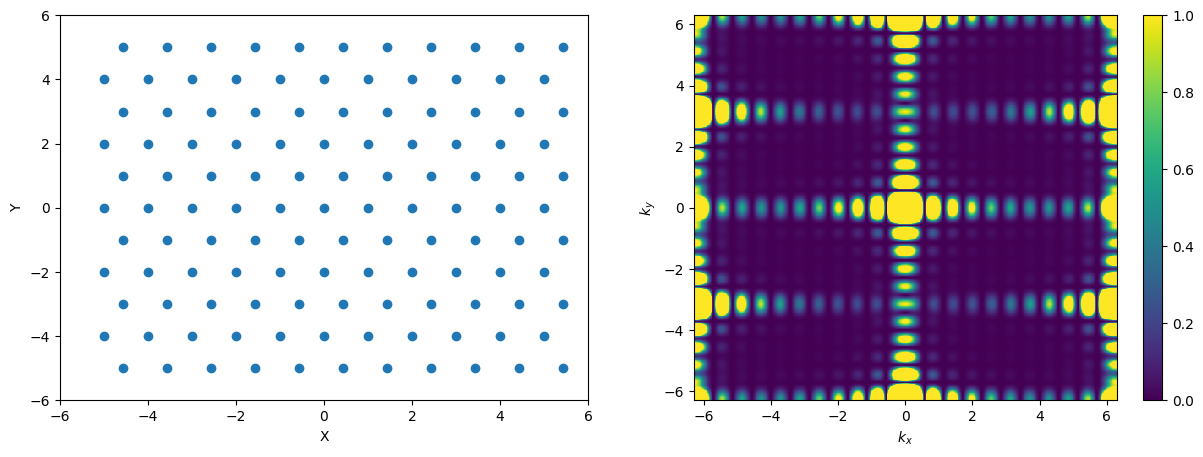

In [54]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(X,Y)
plt.xlim([-LengthSimDomain/2 - 1,LengthSimDomain/2+ 1])
plt.ylim([-LengthSimDomain/2 - 1,LengthSimDomain/2+ 1])
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(1,2,2)
plt.pcolormesh(kx,ky,S_test, cmap = 'viridis', vmin=0, vmax=1) 
plt.colorbar(location="right")
plt.xlabel("$k_x$")
plt.ylabel("$k_y$")